In [ ]:
# Install and upgrade some Python libraries for Colab
! pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
# Set up the programming environment

# import data munging libraries 

import numpy as np
import pandas as pd

# import drawing libraries and configure drawing settings

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
sns.set_style('whitegrid')
%config InlineBackend.figure_format="retina" 

# import several utilities

import yfinance as yf
from datetime import datetime 
from sklearn.preprocessing import MinMaxScaler

# import tensorflow and keras APIs

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.models import Sequential


## Task 1

Read through the code and explanations in *FFN for Handwritten Digit Recognition.ipynb* (please download the latest version), and answer the following questions:



**Question 1.1**

The neural network used for the handwritten digit recognition problem has a structure summarized as follows:

```
Model: "my_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 flattened_input (Flatten)   (None, 784)               0         
                                                                 
 fully_connected_1 (Dense)   (None, 128)               100480    
                                                                 
 fully_connected_2 (Dense)   (None, 64)                8256      
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
=================================================================
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
```

Explain why the number of parameters between the input layer and the 1st hidden layer is `100480`. Similarly, explain why there are `8256` and `650` parameters between the 1st hidden layer and the 2nd hidden layer and between the 2nd hidden layer and the output layer, respectively.


>Type your answer here

### For Dense Layers:
output_size * (input_size + 1) == number_parameters, the bias is 1.

parameters between the input layer and the 1st hidden layer = 128 * (784 + 1) = 100480.

parameters between 1st layer and the 2nd hidden layer = 64 * (128+1) = 8256.

parameters between 2nd layer and the output hidden layer = 10 * (64 + 1) = 650.

**Question 2**

Train the same model with the following 4 sets of hyperparameters:

Set 1: `optimizer=keras.optimizers.SGD()`, `learning_rate=0.001`, and `batch_size=32`, and `epochs=10`;

Set 2: `optimizer=keras.optimizers.SGD()`, `learning_rate=0.01`, and `batch_size=32`, and `epochs=10`;

Set 3: `optimizer=keras.optimizers.Adam()`, `learning_rate=0.001`, and `batch_size=32`, and `epochs=10`;

Set 4: `optimizer=keras.optimizers.Adam()`, `learning_rate=0.001`, and `batch_size=128`, and `epochs=10`.

Keep your code and results for the 4 rounds of model training in this file.

Compare them in terms of their training speeds (i.e., how fast does the optimization algorithm process all training examples once?) and convergence rates. Which one among the 4 sets do you think work best for this multi-class classification problem on that given dataset? Also try to explain why is that?

- Note: Accuracy in the model training output indicates the proportion of correctly predicted examples by the model. The closer to 1 that metric, the better the resulting model is.

- Tips: How to set different hyperparameters with TensorFlow:

  - `optimizer` is set via the argumet to the `.compile()` method, 
  - `learning_rate` is set as the argument to the optimizer implementation you choose. E.g., `keras.optimizers.Adam(learning_rate=0.001)`.
  - Both `batch_size` and `epochs` are set as the arguments to the `.fit()` method.

- Reference: [`Adam()`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and [`SGD()`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/SGD)

In [4]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(f"\nThe shape of features: {X_train.shape}")
print(f"The shape of labels: {y_train.shape}")

# We scale the pixel intensities down to the 0-1 range by dividing by 255.
X_train, X_test = X_train/255.0, X_test/255.0

11490434/11490434 [==============================] - 0s 0us/step

The shape of features: (60000, 28, 28)
The shape of labels: (60000,)


In [10]:
# your code to train the model with the 1st set of hyperparameters


model_1 = Sequential([layers.Flatten(input_shape=[28, 28], name="flattened_input"),
                    layers.Dense(128, activation='relu', name="fully_connected_1"),
                    layers.Dense(64, activation='relu', name="fully_connected_2"),
                    layers.Dense(10, activation='softmax', name="output")],
                   name="my_mnist_model")



# Set 1: optimizer=keras.optimizers.SGD(), learning_rate=0.001, and batch_size=32, and epochs=10;
model_1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), 
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              
              metrics=['accuracy'])

model_output_1 = model_1.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7200 - accuracy: 0.5519
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8629 - accuracy: 0.8028
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5936 - accuracy: 0.8520
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4877 - accuracy: 0.8727
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4314 - accuracy: 0.8837
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3959 - accuracy: 0.8917
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3712 - accuracy: 0.8970
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3526 - accuracy: 0.9010
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3378 - accuracy: 0.9050
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.325

In [7]:
# your code to train the model with the 2nd set of hyperparameters



model_2 = Sequential([layers.Flatten(input_shape=[28, 28], name="flattened_input"),
                    layers.Dense(128, activation='relu', name="fully_connected_1"),
                    layers.Dense(64, activation='relu', name="fully_connected_2"),
                    layers.Dense(10, activation='softmax', name="output")],
                   name="my_mnist_model")



# Set 2: optimizer=keras.optimizers.SGD(), learning_rate=0.01, and batch_size=32, and epochs=10;
model_2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), 
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              
              metrics=['accuracy'])

model_output_2 = model_2.fit(X_train, y_train, batch_size=32, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6278 - accuracy: 0.8322
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2955 - accuracy: 0.9161
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2454 - accuracy: 0.9302
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2130 - accuracy: 0.9392
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1882 - accuracy: 0.9467
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1685 - accuracy: 0.9520
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1524 - accuracy: 0.9564
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1391 - accuracy: 0.9598
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1274 - accuracy: 0.9635
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.118

In [8]:
# your code to train the model with the 3rd set of hyperparameters



model_3 = Sequential([layers.Flatten(input_shape=[28, 28], name="flattened_input"),
                    layers.Dense(128, activation='relu', name="fully_connected_1"),
                    layers.Dense(64, activation='relu', name="fully_connected_2"),
                    layers.Dense(10, activation='softmax', name="output")],
                   name="my_mnist_model")



# Set 3: optimizer=keras.optimizers.Adam(), learning_rate=0.001, and batch_size=32, and epochs=10;

model_3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              
              metrics=['accuracy'])

model_output_3 = model_3.fit(X_train, y_train, batch_size=32, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2422 - accuracy: 0.9294
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0987 - accuracy: 0.9700
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0697 - accuracy: 0.9789
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0533 - accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0405 - accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0340 - accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0274 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0228 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0223 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.017

In [9]:
# your code to train the model with the 4th set of hyperparameters




model_4 = Sequential([layers.Flatten(input_shape=[28, 28], name="flattened_input"),
                    layers.Dense(128, activation='relu', name="fully_connected_1"),
                    layers.Dense(64, activation='relu', name="fully_connected_2"),
                    layers.Dense(10, activation='softmax', name="output")],
                   name="my_mnist_model")



# Set 4: optimizer=keras.optimizers.Adam(), learning_rate=0.001, and batch_size=128, and epochs=10.

model_4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              
              metrics=['accuracy'])

model_output_4 = model_4.fit(X_train, y_train, batch_size=128, epochs=10)


Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3296 - accuracy: 0.9077
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1310 - accuracy: 0.9620
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0913 - accuracy: 0.9724
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0702 - accuracy: 0.9792
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0555 - accuracy: 0.9834
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0454 - accuracy: 0.9859
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0364 - accuracy: 0.9892
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0294 - accuracy: 0.9906
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0242 - accuracy: 0.9926
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0212 - accuracy: 0.9937

In [ ]:
# Set 1: optimizer=keras.optimizers.SGD(), learning_rate=0.001, and batch_size=32, and epochs=10;

# Set 2: optimizer=keras.optimizers.SGD(), learning_rate=0.01, and batch_size=32, and epochs=10;

# Set 3: optimizer=keras.optimizers.Adam(), learning_rate=0.001, and batch_size=32, and epochs=10;

# Set 4: optimizer=keras.optimizers.Adam(), learning_rate=0.001, and batch_size=128, and epochs=10.

In [12]:
pd.DataFrame({'set_name':['set_1','set_2','set_3','set_4'],'batch_size':[32,32,32,128],
        'learning_rate':[0.001, 0.01, 0.001,0.001],
        'epochs':[10,10,10,10],
        'optimizer':['SGD','SGD','Adam','Adam'],
        'training_time_all_sample_once_s':[5,5,6,3],
        'final_accuracy':[0.9076,0.9659,0.9941, 0.9937]                  })

,set_name,batch_size,learning_rate,epochs,optimizer,training_time_all_sample_once_s,final_accuracy
0,set_1,32,0.001,10,SGD,5,0.9076
1,set_2,32,0.010,10,SGD,5,0.9659
2,set_3,32,0.001,10,Adam,6,0.9941
3,set_4,128,0.001,10,Adam,3,0.9937


> Type your comparison results and explanations here.

### Set 4 has the minimum training time and thus has the highest training speed. 
### Set 3 works best for this multi-class classification problem on the given dataset since its final training accuracy (0.9941) was the highest among all the models.


---

<Br>

# Task 2: Training a Feed-forward Network with Time Series Data



The application we'll look at in this section is financial time series analysis. Let's first grab a pandas DataFrame for Apple's daily stock prices from 2012/01/01 to 2023/01/01:


In [13]:
# download Apple's stock price data between 2012/01/01 and 2023/01/01
apple_df = yf.download('AAPL', start=datetime(2012, 1, 1), end=datetime(2023, 1, 1))
apple_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500195,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567369,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706893,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839725,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819361,394024400
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400


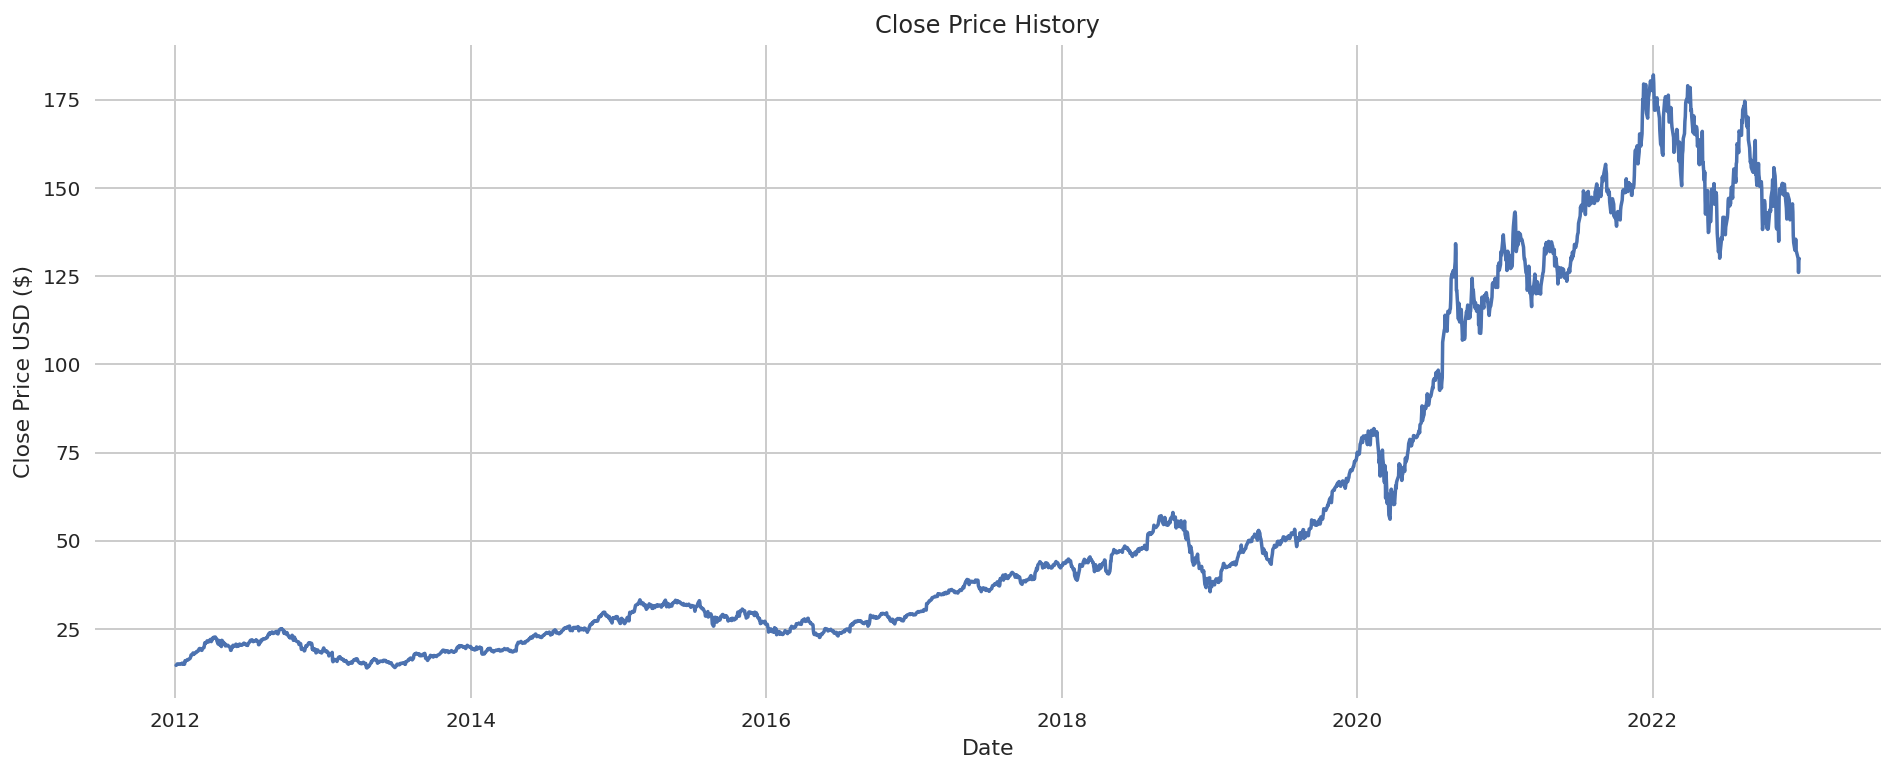

In [14]:
# plot the closing price history
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(apple_df['Close'])
ax.set(title='Close Price History', xlabel='Date', ylabel='Close Price USD ($)')
plt.show()

### Task 2.1 Data Preprocessing

Suppose we have a toy data series of 13 values as follows:

```
[157.96000671, 159.47999573, 166.02000427, 156.77000427, 157.27999878, 
 152.05999756, 154.50999451, 146.5, 142.55999756, 147.11000061, 
 145.53999329, 149.24000549, 140.82000732]
```
and our goal here is to use every 10 values to predict the next value in the time series.

To build a model that meets this need, we need to preprocess the series above to generate windows of 10 values and pair each sequence with the next value as follows:

The 1st window of 10 values (i.e., 10 input features) and its label (i.e., the 11th value in the time series):

```
10 Features: [157.96000671, 159.47999573, 166.02000427, 156.77000427, 157.27999878, 
              152.05999756, 154.50999451, 146.5, 142.55999756, 147.11000061]
Label: 145.53999329, 
```

The 2nd window of 10 values and its label (i.e., the 12th value in the time series):

```
10 Features: [159.47999573, 166.02000427, 156.77000427, 157.27999878, 152.05999756, 
              154.50999451, 146.5, 142.55999756, 147.11000061, 145.53999329]
Label: 149.24000549     
```

The 3rd window of 10 values and its label (i.e., the 13th value in the time series):

```
10 Features: [166.02000427, 156.77000427, 157.27999878, 152.05999756, 154.50999451, 
              146.5, 142.55999756, 147.11000061, 145.53999329, 149.24000549]
Label: 140.82000732    
```

Pictorially:

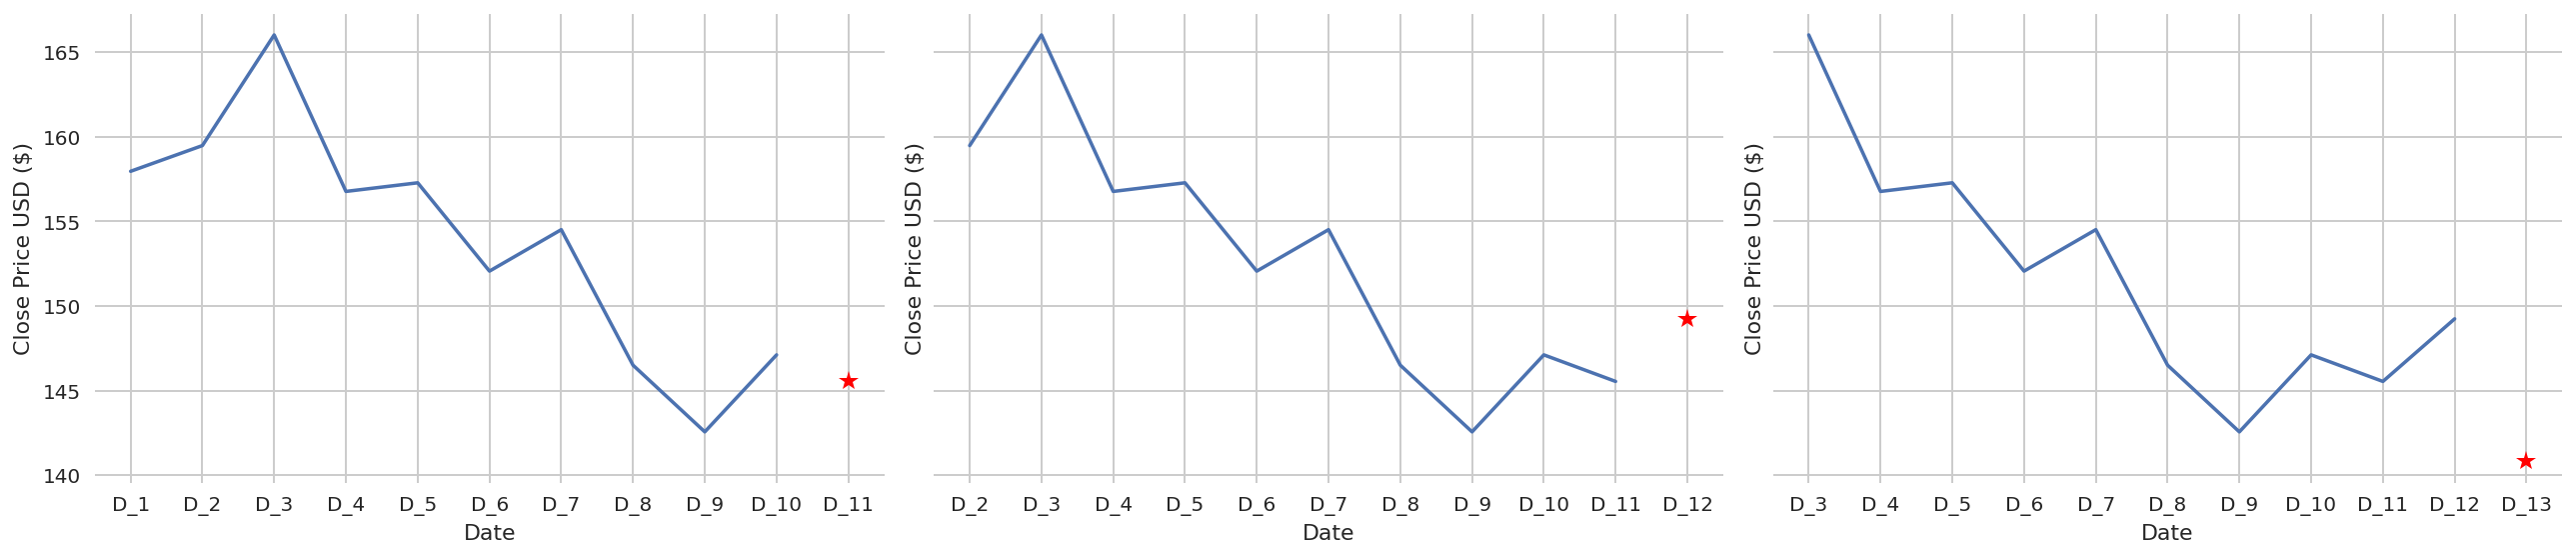

Note that we can enlarge or shrink the window size to include longer or shorter history for stock price forecasting.


The code below gives a helper function that divides price data into windows of a fixed size and pairs each window with the next value.


In [15]:
def generate_sequences(data, window_size):  
  """
  data: an n-by-1 array
  window_size: an integer
  """
  features_sequences = [data[i-window_size:i, 0] for i in range(window_size, len(data))]
  target_sequences = [data[i, 0] for i in range(window_size, len(data))]

  features_sequences = np.stack(features_sequences)[:, :, np.newaxis]
  target_sequences = np.array(target_sequences)

  return features_sequences, target_sequences


Now, let's rescale the price data to have a `[0, 1]` range:

In [17]:
# Scale the data to have the range (0, 1)
# We use MinMaxScaler from scikit-learn to do feature rescaling
price_data = apple_df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))  
scaled_data = scaler.fit_transform(price_data)

Let's say we want to use past 30 daily prices to predict today's stock price. So, we use the `generate_sequences()` helper function to divide all prices into windows of size 30.   

In [18]:
print("The number of prices used for training:", len(price_data))

# The window size is a hyperparameter that can be tuned
# you can think about how it may affect model predictions

WINDOW_SIZE = 30

X_train, y_train = generate_sequences(scaled_data, WINDOW_SIZE)

# explore the data

print("The shape of input features:", X_train.shape)
print('-'*100)
print("""The data structure that contains all input features is a 3-dimentional array, 
with the first dimension representing the number of windows and the second the size of each window.
By convention, we also include the 3rd dimension, whose size is 1 in this example because each price is a scaler.""")  
print('-'*100)
print("The shape of labels:", y_train.shape)
print('-'*100)
print("""The size of vector y is the same as the number of windows.""")  

The number of prices used for training: 2768
The shape of input features: (2738, 30, 1)
----------------------------------------------------------------------------------------------------
The data structure that contains all input features is a 3-dimentional array, 
with the first dimension representing the number of windows and the second the size of each window.
By convention, we also include the 3rd dimension, whose size is 1 in this example because each price is a scaler.
----------------------------------------------------------------------------------------------------
The shape of labels: (2738,)
----------------------------------------------------------------------------------------------------
The size of vector y is the same as the number of windows.


Now, each window is an training example with 30 input features, and has been paired with a label.

### Task 2.2 Build and Train a Feed-Forward Network Model 
 

**Please complete the code below (replace ellipses with proper code) to build and train a 3-layer feed-forward model**. 

- You can choose the sizes of the 2 hidden layers to be 32;

- Use [`loss=losses.MeanSquaredError()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError) if you want to customize some hyperparameters related to the mean square error loss, or simply `loss='mse'`;

- Use [`optimizer=optimizers.Adam()`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) if you want to customize some hyperparameters related to the optimization process, or simply  `optimizer='adam'` .




In [19]:
# Specify the model structure
price_forcast_model = Sequential([layers.Flatten(input_shape=X_train.shape[1:]),
                    layers.Dense(32, activation='relu', name="fully_connected_1"),
                    layers.Dense(32, activation='relu', name="fully_connected_2"), 
                    layers.Dense(1, name="output")
                    
                    ]             
                                  
                                  )


# Print the model summary
print(price_forcast_model.summary(), "\n")

# Compile the model
price_forcast_model.compile( optimizer=optimizers.Adam(),
                loss='mse',

)

# Train the model
price_forcast_model_output = price_forcast_model.fit(X_train, y_train, batch_size=32, epochs=10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30)                0         
                                                                 
 fully_connected_1 (Dense)   (None, 32)                992       
                                                                 
 fully_connected_2 (Dense)   (None, 32)                1056      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________
None 

Epoch 1/10
86/86 [==============================] - 1s 2ms/step - loss: 0.1040
Epoch 2/10
86/86 [==============================] - 0s 2ms/step - loss: 3.5496e-04
Epoch 3/10
86/86 

A standard follow-up is to plot the training loss over epochs:

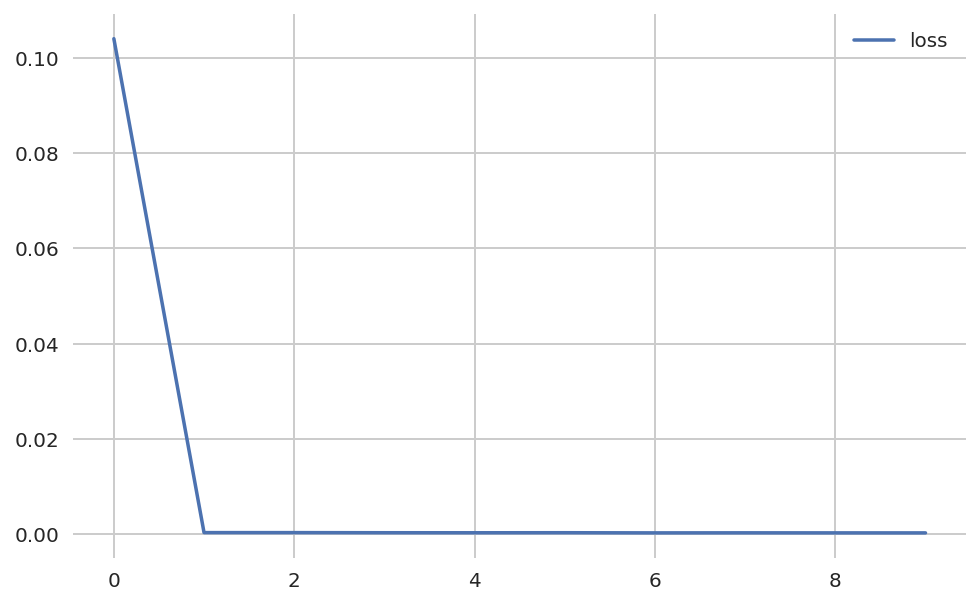

In [20]:
metric_df = pd.DataFrame(price_forcast_model_output.history)
metric_df[['loss']].plot(figsize=(8, 5))
plt.grid(True)

We may also want to know how the model performs for, say, the latest 200 days:

In [21]:
# Because the data in X_train has been scaled by MinMaxScaler from scikit-learn 
# to compare the predicted values with the true values,
# we have to do an inverse transformation to cast the predicted values to the original scale
predictions = price_forcast_model.predict(X_train[-200:])
predictions = scaler.inverse_transform(predictions)

# Calculate the mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - price_data[-200:]) ** 2)))
print("\nThe root mean squared error (RMSE) is:", rmse)

7/7 [==============================] - 0s 3ms/step

The root mean squared error (RMSE) is: 6.174424007176586


Now, you can run the following code to plot the true time series and the predicted time series for the latest 200 days to see how close they are to each other.

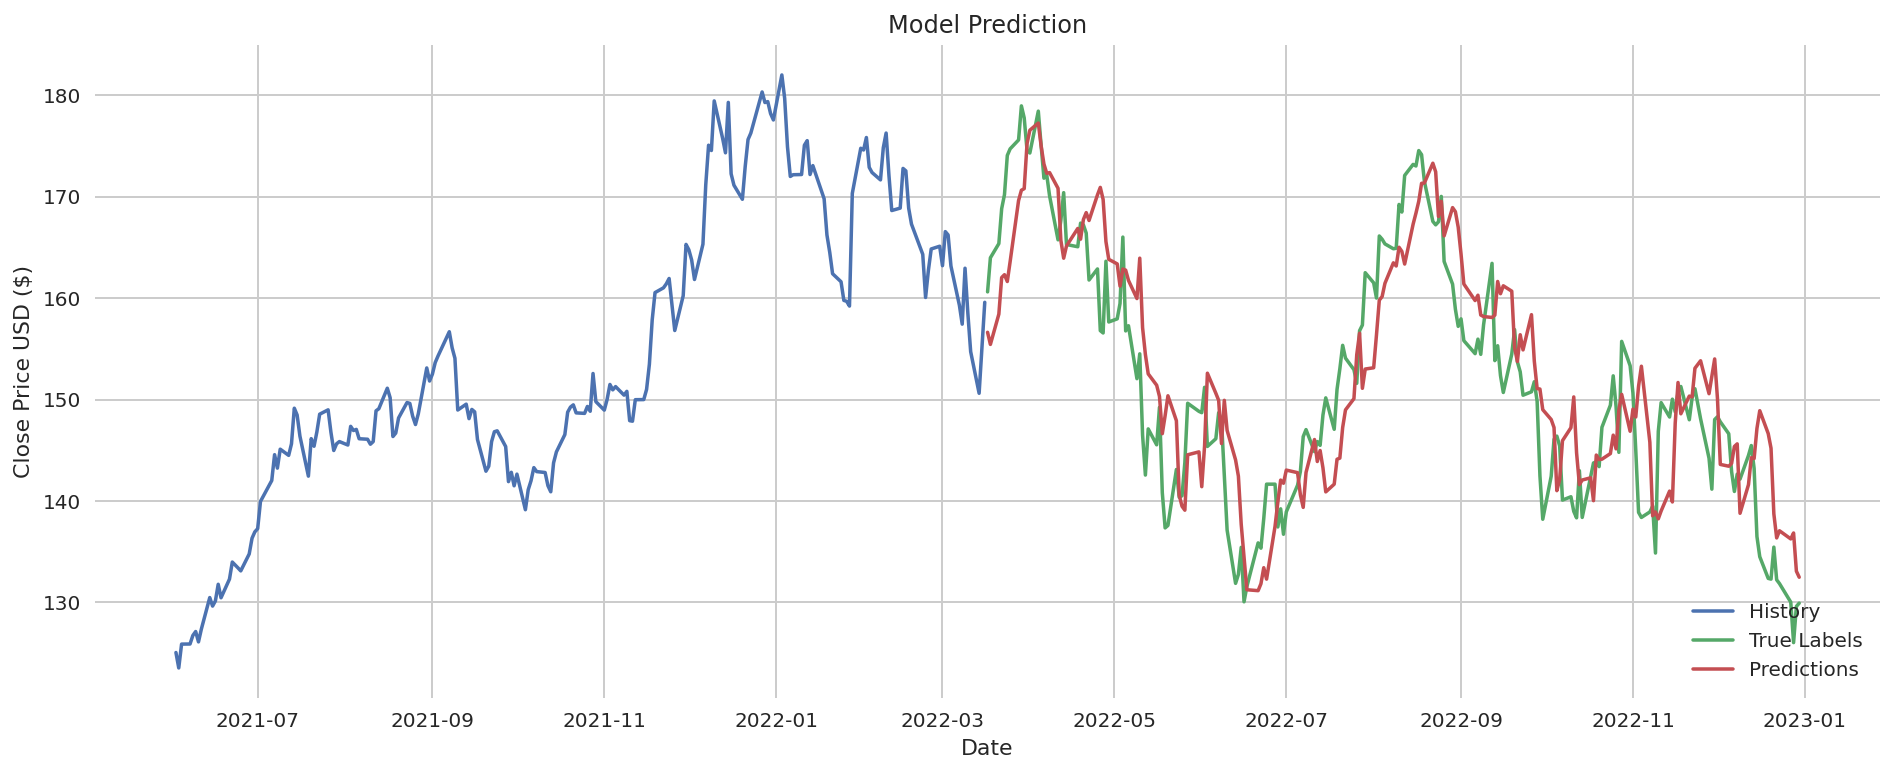

In [23]:
# Plot the data

valid = apple_df.filter(['Close'])[-200:]
valid["Prediction"] = predictions

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(apple_df.filter(['Close'])[-400:-200])
ax.plot(valid)
ax.set(title='Model Prediction', xlabel='Date', ylabel='Close Price USD ($)')
plt.legend(['History', 'True Labels', 'Predictions'], loc='lower right')
plt.show()

---

<br>

# Task 3: Training a Recurrent Neural Network with Time Series Data (Optional)


A type of neural networks that can better capture the time series nature of stock price forecasting is recurrent neural networks (RNNs), which is basically a feed-forward network repeating itself multiple times so as to be unrolled along the time dimension. And these multiple copies of the same network each passes a message to a successor.

<img src="https://raw.githubusercontent.com/justinjiajia/deeplearning/main/images/RNN_price_forecast.PNG" width=600 />


In relation to stock price forecasting, the number of time steps of the resulting RNN is typically equal to the window size we use (e.g., 30).

The bulding block of an RNN has different implementations in TensorFlow, and the simplest one is [`SimpleRNN()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN). 

With it, the network shown in the figure above can be expressed and trained with the following code snippet:


 







In [24]:
# Build the RNN model

# SimpleRNN defines one copy of the recurrent part. 32 is the number of blue units contaied in each copy
RNN_model = Sequential([layers.SimpleRNN(32, input_shape= X_train.shape[1:], name="recurrent"),   
                        layers.Dense(1, name="output")],
                       name="my_1st_rnn_model")


# Print the model summary
print(RNN_model.summary(), "\n")

# Compile the model
RNN_model.compile(optimizer='adam', loss='mse')

# Train the model
RNN_model.fit(X_train, y_train, batch_size=32, epochs=10)

# Compute the model's predicted price values 
predictions = RNN_model.predict(X_train[-200:])
predictions = scaler.inverse_transform(predictions)


# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - price_data[-200:]) ** 2)))
print("\nThe root mean squared error (RMSE) is:", rmse)


Model: "my_1st_rnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 recurrent (SimpleRNN)       (None, 32)                1088      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________
None 

Epoch 1/10
86/86 [==============================] - 2s 6ms/step - loss: 0.0017
Epoch 2/10
86/86 [==============================] - 0s 6ms/step - loss: 3.0603e-04
Epoch 3/10
86/86 [==============================] - 0s 5ms/step - loss: 2.7532e-04
Epoch 4/10
86/86 [==============================] - 1s 6ms/step - loss: 2.8521e-04
Epoch 5/10
86/86 [==============================] - 1s 6ms/step - loss: 2.4827e-04
Epoch 6/10
86/86 [========

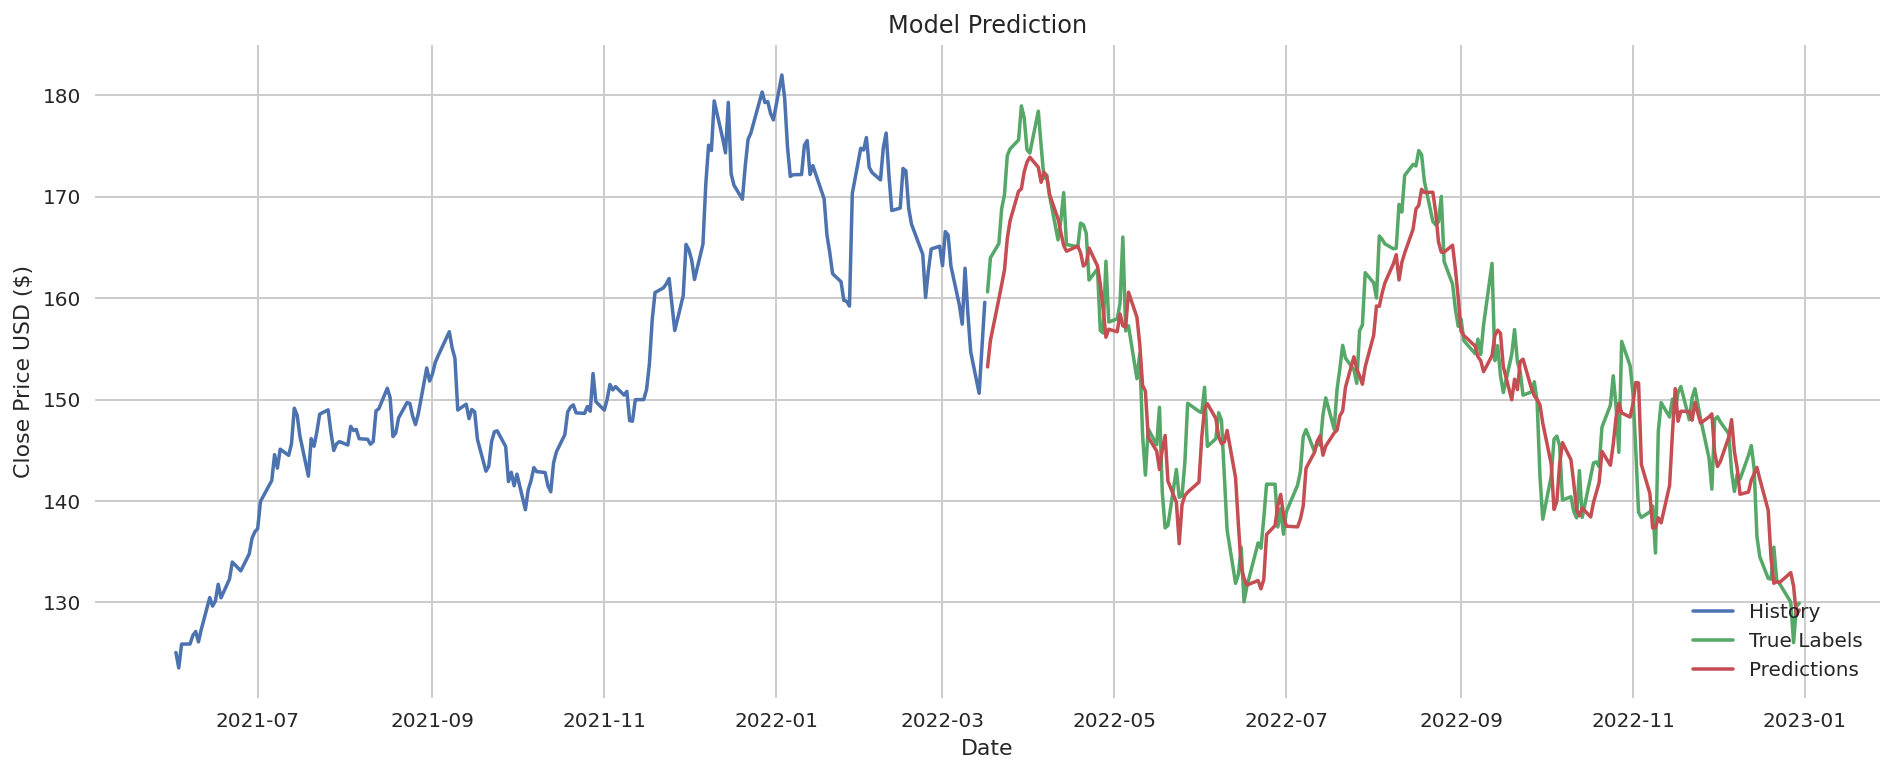

In [25]:
# Plot the data

valid = apple_df.filter(['Close'])[-200:]
valid["Prediction"] = predictions

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(apple_df.filter(['Close'])[-400:-200])
ax.plot(valid)
ax.set(title='Model Prediction', xlabel='Date', ylabel='Close Price USD ($)')
plt.legend(['History', 'True Labels', 'Predictions'], loc='lower right')
plt.show()